In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("happiness.csv")

In [3]:
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le=LabelEncoder()

In [6]:
#Since country and region are strings we convert into numerical values.Since model can only understand only numerical values.

data['Country']=le.fit_transform(data['Country'].astype(str))

In [7]:
data['Region']=le.fit_transform(data['Region'].astype(str))

In [8]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

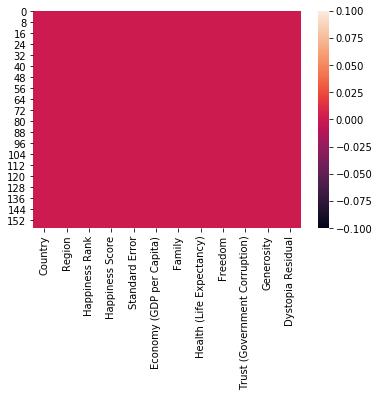

In [9]:
#There are no null values in the dataset


sns.heatmap(data.isnull())

In [10]:
#Since the country,region and the rank is not of much importance in determining the happiness score.Drop it!

data.drop("Country",axis=1,inplace=True)
data.drop("Region",axis=1,inplace=True)
data.drop("Happiness Rank",axis=1,inplace=True)

In [11]:


data

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [12]:
#There is some skewness found in Family,Health,Trust and genorosity 
#Outliers found by comparing 75 percentile and max like Stanard Error,Trust,Genorosity and Dystopia has large difference between them
data.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


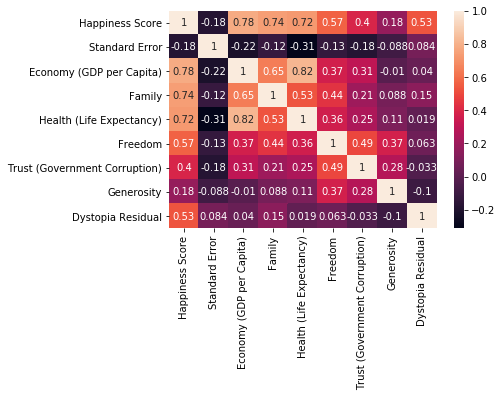

In [13]:
#Almost every feature contributes positively towards the target except standard error .It is negatively correlated.

sns.heatmap(data.corr(),annot=True)


In [14]:
#Drop Standard error since it is negatively correlated
data.drop("Standard Error",axis=1,inplace=True)

In [15]:
#Acceptable skewness is from -0.55 to 0.55 we have Family,Health which are left skewd and Trust and Genorosity which are right skewed.
data.skew()

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

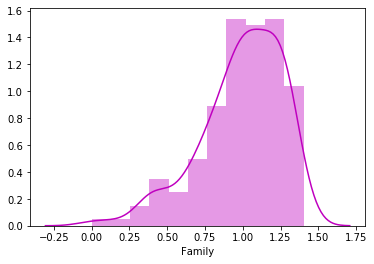

In [16]:
#left skewd
sns.distplot(data["Family"],color="m")

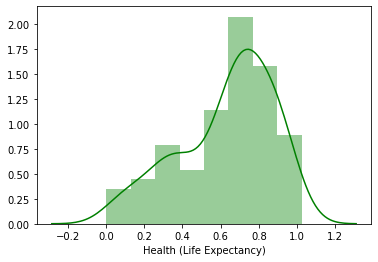

In [17]:
#left skewd
sns.distplot(data["Health (Life Expectancy)"],color="g")

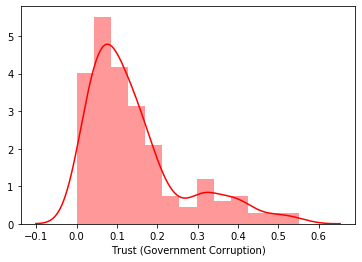

In [18]:
#Right skewed
sns.distplot(data["Trust (Government Corruption)"],color="r")

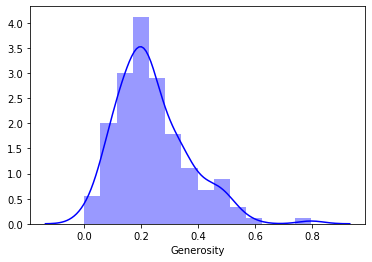

In [19]:
#Right Skewed
sns.distplot(data["Generosity"],color="b")

In [20]:
#Removing  left skewness
data["Trust (Government Corruption)"]=np.sqrt(data["Trust (Government Corruption)"])

In [21]:
data["Trust (Government Corruption)"].skew()

0.5076631719436371

In [22]:
#Removing  left skewness
data["Generosity"]=np.sqrt(data["Generosity"])

In [23]:
data["Generosity"].skew()

-0.13096114407238377

In [24]:
#Removing Right skewness
data["Family"]=data["Family"]**2

In [25]:
data["Family"].skew()

-0.2557276286302913

In [26]:
#Removing Right skewness
data["Health (Life Expectancy)"]=data["Health (Life Expectancy)"]**2

In [27]:
data["Health (Life Expectancy)"].skew()

-0.014062846673226596

In [28]:
#No skewness beyond acceptance range
data.skew()


Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -0.255728
Health (Life Expectancy)        -0.014063
Freedom                         -0.413462
Trust (Government Corruption)    0.507663
Generosity                      -0.130961
Dystopia Residual               -0.238911
dtype: float64

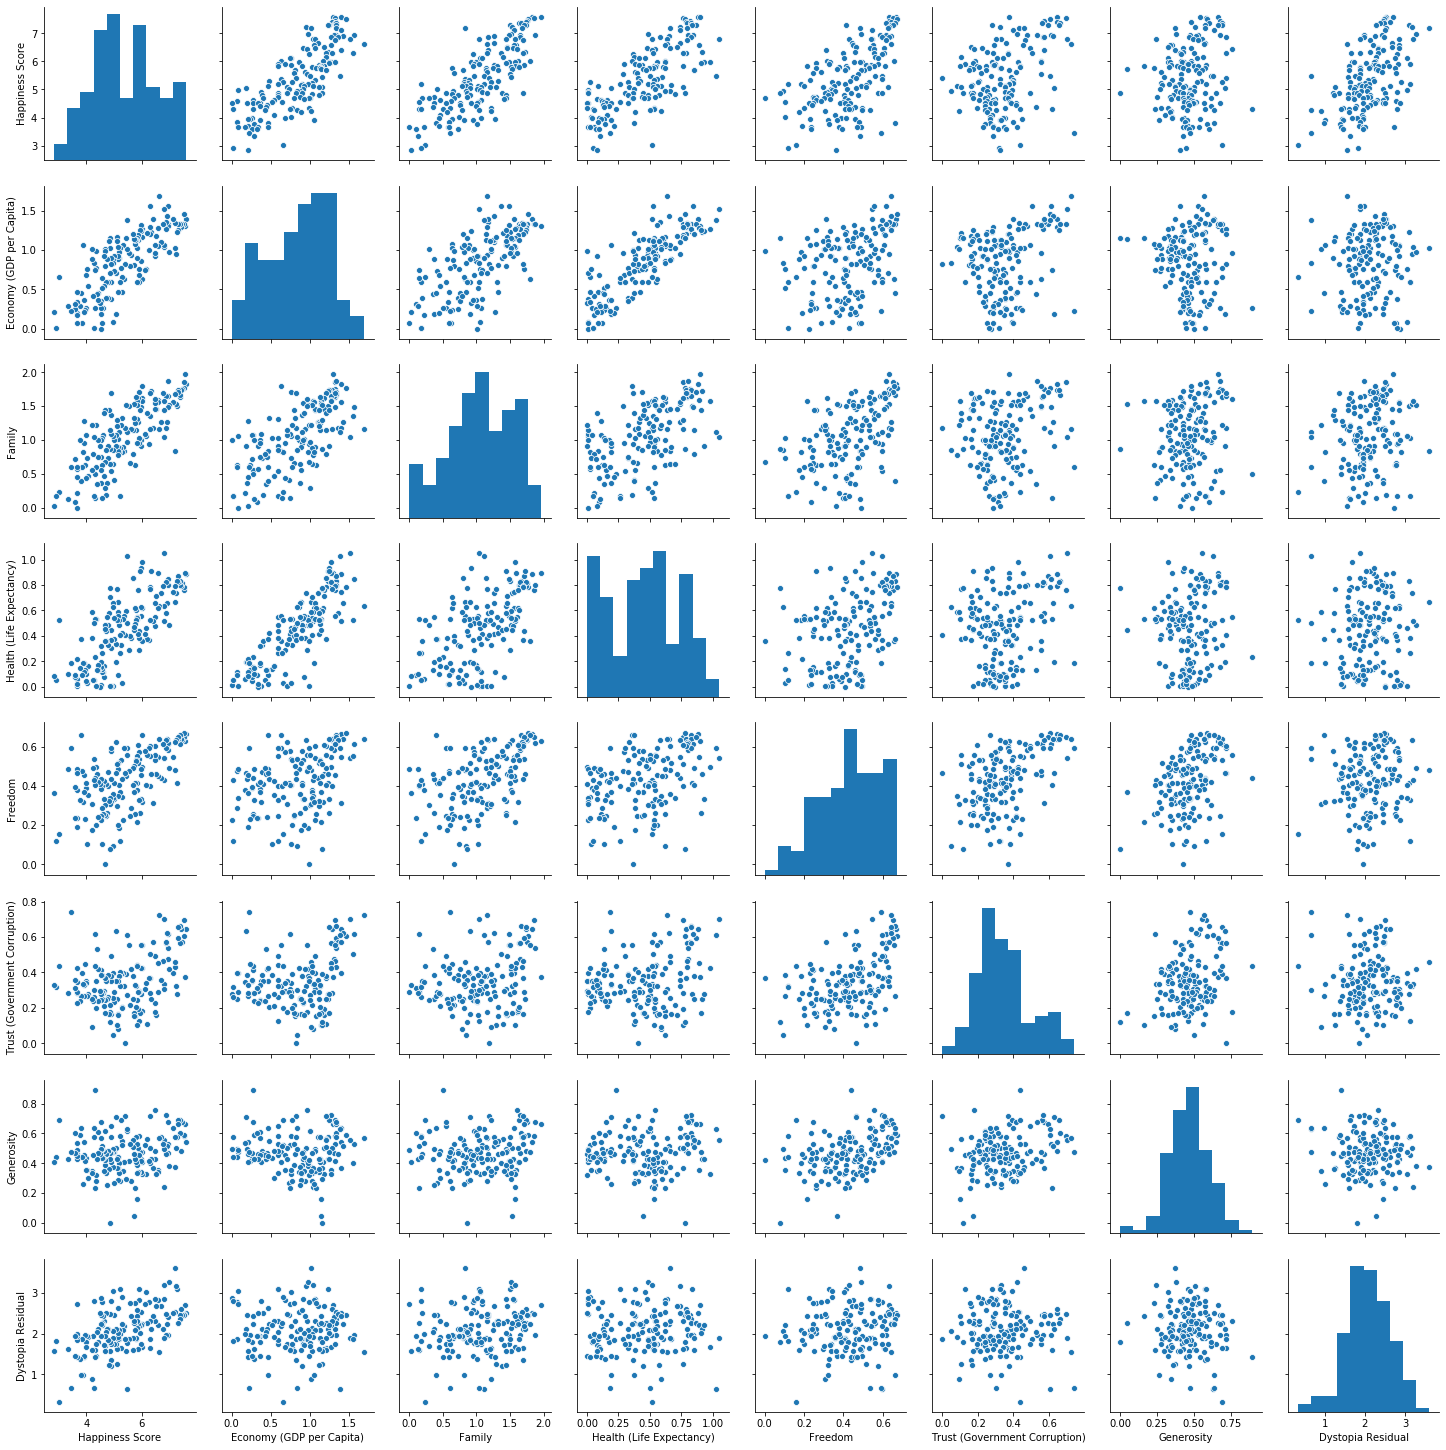

In [29]:
#Lets see how each feature share relationship with other features.
#Hapiness score is likey having linear relatio with econmy,health and Freedom.It has direct relationship with Trust.
sns.pairplot(data)

Happiness Score                     AxesSubplot(0.125,0.657941;0.227941x0.222059)
Economy (GDP per Capita)         AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Family                           AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Health (Life Expectancy)            AxesSubplot(0.125,0.391471;0.227941x0.222059)
Freedom                          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Trust (Government Corruption)    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Generosity                             AxesSubplot(0.125,0.125;0.227941x0.222059)
Dystopia Residual                   AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

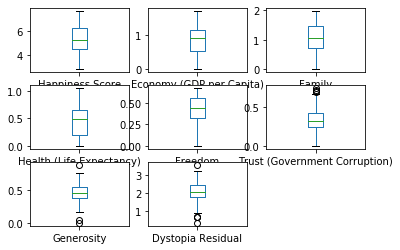

In [30]:
#Lets take look at the outliers,We have outliers in Trust,Genorosity and Dystopia 
data.plot(kind="box",subplots=True,layout=(3,3))

In [31]:
#Removing outliers using zscore
from scipy.stats import zscore
z=np.abs(zscore(data))
z


array([[1.93736005, 1.36962124, 1.60987885, ..., 1.99453385, 0.57205491,
        0.75825809],
       [1.91458063, 1.13522625, 1.91505464, ..., 0.19008801, 1.44080569,
        1.09285682],
       [1.88479215, 1.19286069, 1.67298891, ..., 2.30979156, 0.86858624,
        0.71233526],
       ...,
       [2.0761992 , 0.45524543, 1.74677651, ..., 0.57986048, 1.63848687,
        3.20843049],
       [2.1646885 , 2.06756644, 1.8573694 , ..., 0.20087891, 0.18313939,
        0.48198451],
       [2.22251319, 1.58633379, 2.17998446, ..., 0.13199882, 0.45127425,
        0.96361241]])

In [32]:
threshold=3
print(np.where(z>3))

(array([ 63, 101, 128, 155], dtype=int64), array([6, 6, 6, 7], dtype=int64))


In [33]:
#Drop data points having z greater than 3
data=data[(z<3).all(axis=1)]

In [34]:
data.shape

(154, 8)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
data

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.821177,0.886290,0.66557,0.647904,0.544775,2.51738
1,7.561,1.30232,1.966249,0.898401,0.62877,0.376098,0.660530,2.70201
2,7.527,1.32548,1.851178,0.764995,0.64938,0.695392,0.584286,2.49204
3,7.522,1.45900,1.771428,0.783597,0.66973,0.604177,0.589059,2.46531
4,7.427,1.32629,1.749297,0.820166,0.63297,0.574082,0.676838,2.45176
...,...,...,...,...,...,...,...,...
152,3.575,0.31982,0.091718,0.092021,0.23414,0.311753,0.604235,1.95210
153,3.465,0.22208,0.598612,0.183732,0.59201,0.742906,0.475689,0.67042
154,3.340,0.28665,0.125217,0.101825,0.48450,0.283019,0.427317,1.63328
156,2.905,0.01530,0.172948,0.050158,0.11850,0.317207,0.444151,1.83302


In [37]:
y=data["Happiness Score"]

In [38]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
152    3.575
153    3.465
154    3.340
156    2.905
157    2.839
Name: Happiness Score, Length: 154, dtype: float64

In [39]:
data

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.821177,0.886290,0.66557,0.647904,0.544775,2.51738
1,7.561,1.30232,1.966249,0.898401,0.62877,0.376098,0.660530,2.70201
2,7.527,1.32548,1.851178,0.764995,0.64938,0.695392,0.584286,2.49204
3,7.522,1.45900,1.771428,0.783597,0.66973,0.604177,0.589059,2.46531
4,7.427,1.32629,1.749297,0.820166,0.63297,0.574082,0.676838,2.45176
...,...,...,...,...,...,...,...,...
152,3.575,0.31982,0.091718,0.092021,0.23414,0.311753,0.604235,1.95210
153,3.465,0.22208,0.598612,0.183732,0.59201,0.742906,0.475689,0.67042
154,3.340,0.28665,0.125217,0.101825,0.48450,0.283019,0.427317,1.63328
156,2.905,0.01530,0.172948,0.050158,0.11850,0.317207,0.444151,1.83302


In [40]:
x=data.drop(["Happiness Score"],axis=1)

In [41]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.821177,0.886290,0.66557,0.647904,0.544775,2.51738
1,1.30232,1.966249,0.898401,0.62877,0.376098,0.660530,2.70201
2,1.32548,1.851178,0.764995,0.64938,0.695392,0.584286,2.49204
3,1.45900,1.771428,0.783597,0.66973,0.604177,0.589059,2.46531
4,1.32629,1.749297,0.820166,0.63297,0.574082,0.676838,2.45176
...,...,...,...,...,...,...,...
152,0.31982,0.091718,0.092021,0.23414,0.311753,0.604235,1.95210
153,0.22208,0.598612,0.183732,0.59201,0.742906,0.475689,0.67042
154,0.28665,0.125217,0.101825,0.48450,0.283019,0.427317,1.63328
156,0.01530,0.172948,0.050158,0.11850,0.317207,0.444151,1.83302


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [43]:
from sklearn.model_selection import train_test_split


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.22)
lg=LinearRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(r2_score(y_test,pred))
print("Mean absolute error :",mean_absolute_error(y_test,pred))
print("Mean squared absolute error :",mean_absolute_error(y_test,pred))
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,pred)))
    

0.9925320814106093
Mean absolute error : 0.07441260178962239
Mean squared absolute error : 0.07441260178962239
Root mean squared error:  0.10386745732512385


In [47]:
from sklearn.model_selection import cross_val_score

In [56]:
scores = cross_val_score(lg, x, y, cv=10)

In [57]:
scores.mean()

0.342956627639261

In [58]:
from sklearn.linear_model import Ridge

In [59]:
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)
pred3=rd.predict(x_test)
r2_score(pred3,y_test)

0.9923107601903685

In [60]:
scores = cross_val_score(rd, x, y, cv=10)

In [61]:
scores.mean()

0.3429630367393715

In [62]:
from sklearn.linear_model import Lasso

In [63]:
Ls=Lasso(alpha=0.001)
Ls.fit(x_train,y_train)
pred4=rd.predict(x_test)
r2_score(pred4,y_test)

0.9923107601903685

In [64]:
#Saving the model
from sklearn.externals import joblib

C:\Users\THIS PC\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [65]:
joblib.dump(lg,"lgfile.obj")

['lgfile.obj']